# ISFS613 Data Science in Financial Services - Lab1 - Q3

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

In [2]:
#### Use the Ticker symbol "TSLA" to access 3 year daily data starting from '2015-07-10' to '2020-07-09') from YAHOO FINANCE.
#### Convert index into column Date and remove the index.
#### PRINT THE FIRST 5 ROWS

df = yf.download("TSLA", start="2015-07-10",end="2020-07-09")
df.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


##### Section 3.1
Plot the cross correlation of the Close price with a lag of 3
Is there any observable correlation in the data with lag 3? Is this data suitable for time-series modeling?

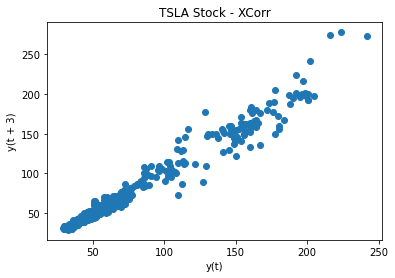

In [3]:
#### Write the code for 3.1

plt.figure()
lag_plot(df['Close'], lag=3)
plt.title('TSLA Stock - XCorr')
plt.show()

#The data is suitable for time-series modeling because 
#correlation is observed with the close price with a lag of 3


##### Section 3.2 Fitting an ARIMA Model

a. Split the data into training and test sets in the ratio 0.7:0.3.

b. Use the Close price column for the training and test set data.

c. Create a list called history which takes in all Close values in training data

d. Create an empty list called model_predictions

e. Loop through each point in the test set

f. Fit an ARIMA model with order parameters (4,1,0) on the history list

g. Get the model forecast output

h. Append the model output to the model_predictions list

i. Get the actual value at the current point in the loop and append it to history list and repeat the loop

In [5]:
#### Write the code for 3.2a
train = df[:881]
test = df[881:1259]


In [6]:
#### Write the code for 3.2b

train2 = train['Close'].values
test2 = test['Close'].values


In [7]:
#### Write the code for 3.2c

history = [i for i in train2]


In [8]:
#### Write the code for 3.2d
model_predictions = []


In [9]:
#### Write the loop for 3.2e to 3.2h

for i in range(len(test2)):
    arima_model = ARIMA(history, order=(4,1,0))
    model_fit = arima_model.fit()
    output = model_fit.forecast()
    model_predictions.append(output[0])
    history.append(test2[i])


##### Section 3.3
Plot the test set data in red and overlay the model predictions in blue

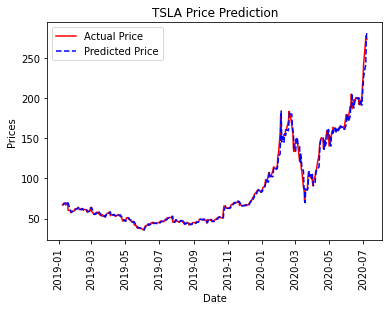

In [11]:
#### Write the code for 3.3

import matplotlib.dates as mdates
fig, ax = plt.subplots()
plt.plot(test.index, test2, color='red', label='Actual Price')
plt.plot(test.index, model_predictions, color='blue',linestyle='dashed',label='Predicted Price')


plt.title('TSLA Price Prediction')


plt.xlabel('Date')
plt.ylabel('Prices')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))
_ = plt.xticks(rotation=90)
plt.legend()
plt.show()
